In [5]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:/Users/Onkar/Downloads/archive/uber.csv")

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [14]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [16]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [17]:
df = df.drop('pickup_datetime',axis=1)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

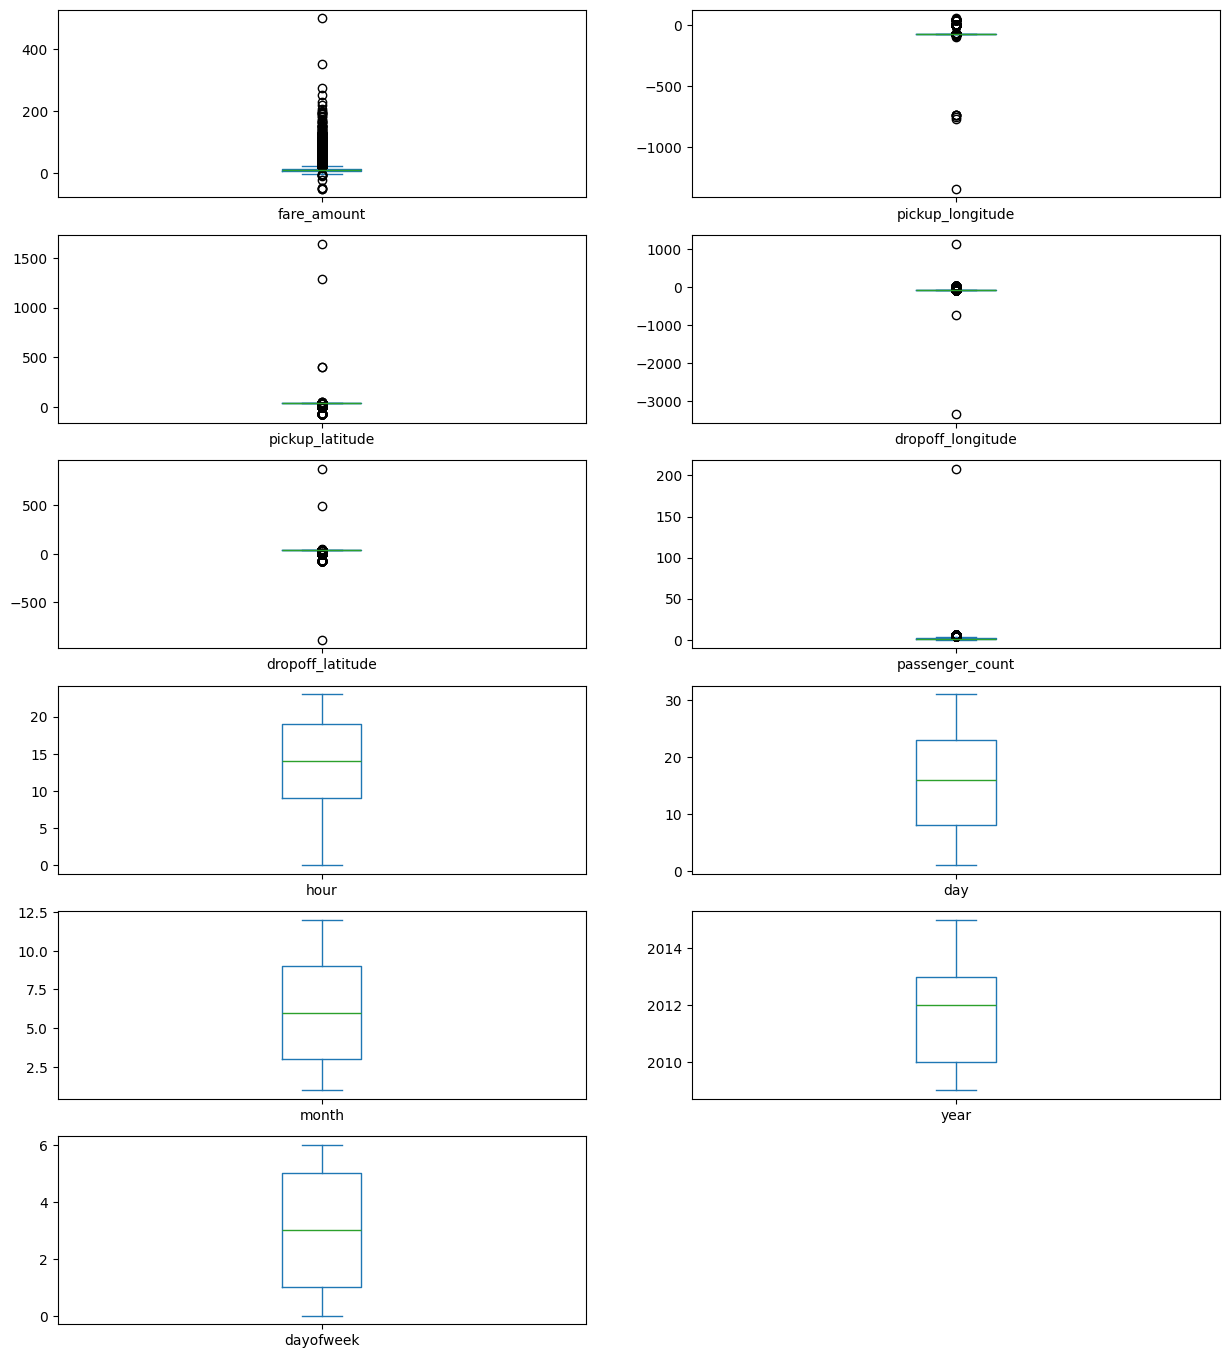

In [18]:

 df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [19]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [20]:
 
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [21]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

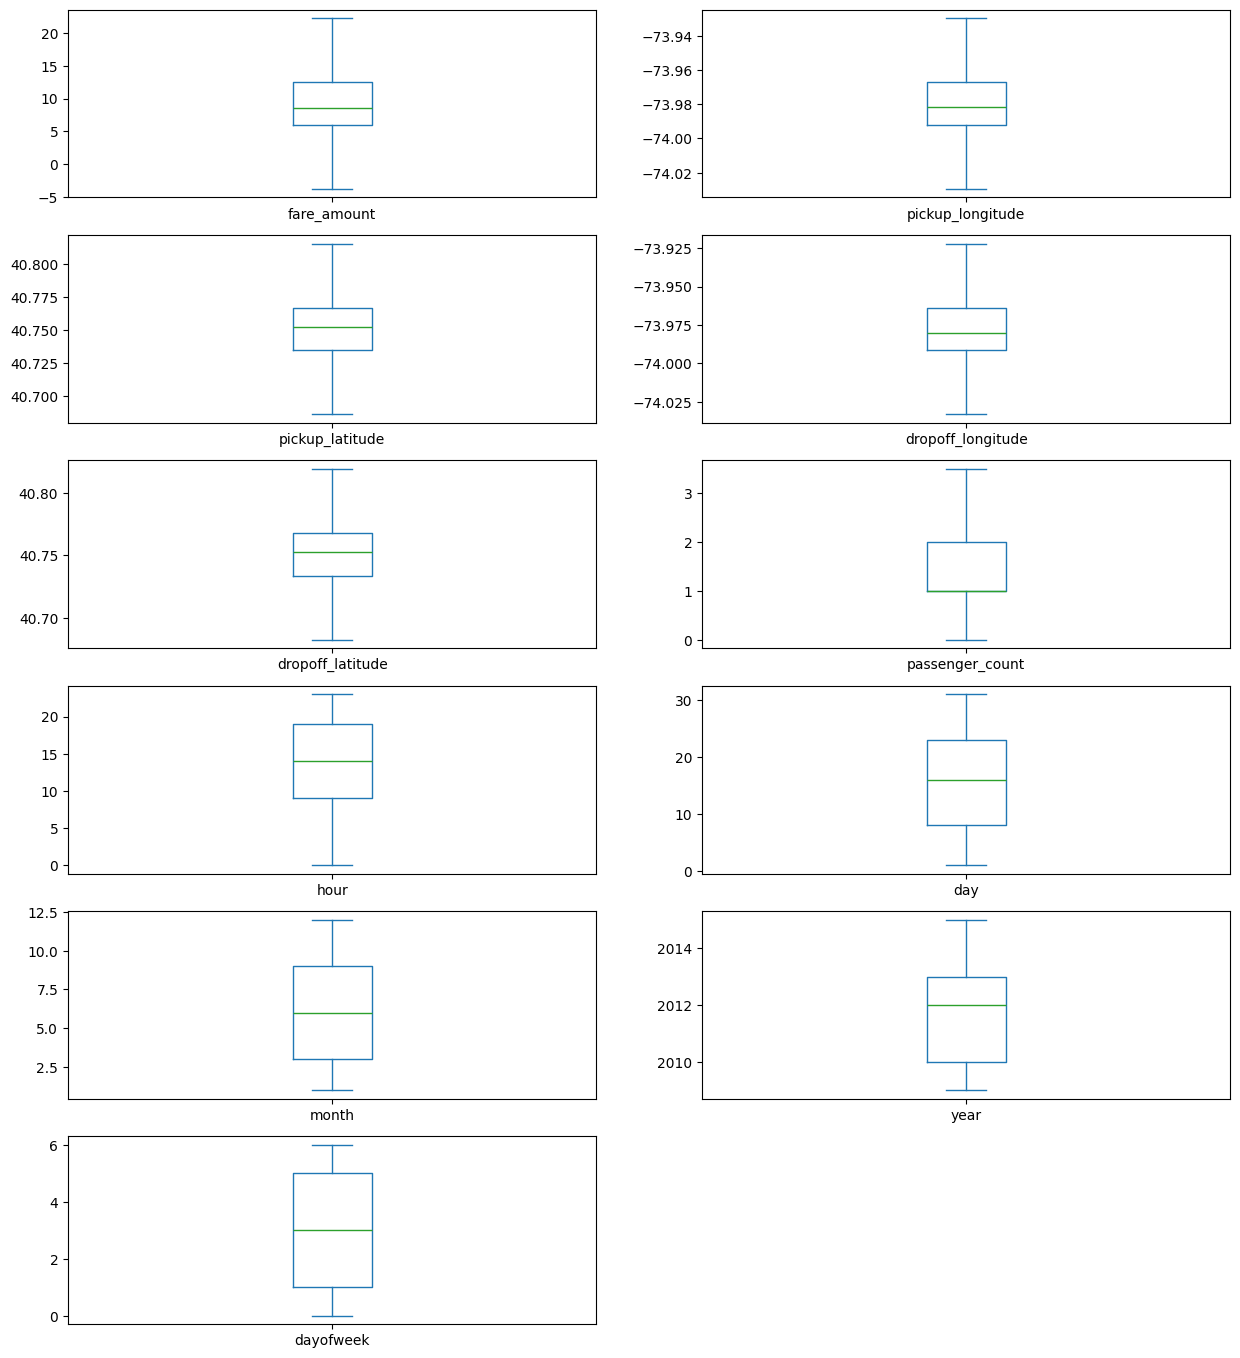

In [22]:
 df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [23]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
                                    ]

In [24]:
 df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')


In [25]:
pip install haversine 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Onkar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Euclad
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1 = df.iloc[pos]['pickup_longitude'], df.iloc[pos]['pickup_latitude']
    long2, lati2 = df.iloc[pos]['dropoff_longitude'], df.iloc[pos]['dropoff_latitude']
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1,loc2)
    travel_dist.append(c)   
print(travel_dist)
df['dist_travel_km'] = travel_dist

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [27]:
df= df.loc[(d
            
           
           )]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (199999, 12)


In [28]:
corr = df.corr() 

In [29]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664,0.786381
pickup_longitude,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.048421
pickup_latitude,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.073387
dropoff_longitude,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.155203
dropoff_latitude,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.052658
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009916
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.035680
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.001739
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785,0.010046
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.002162,-0.012165,-0.115860,1.000000,0.006116,0.022282


<Axes: >

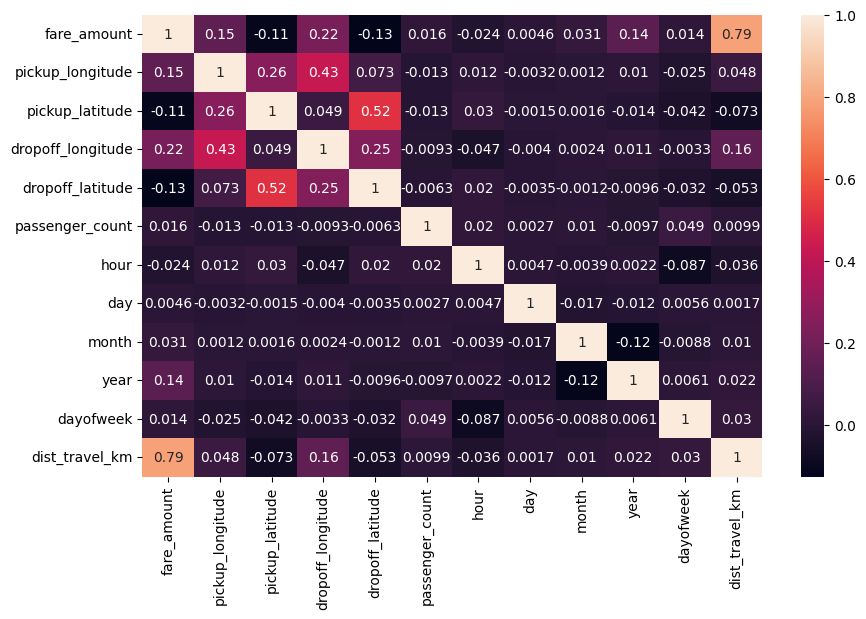

In [30]:

 fig,axis = plt.subplots(figsize = (10,6))
 sns.heatmap(df.corr(),annot = True)

In [31]:
 x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [32]:
y=df['fare_amount']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [34]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [35]:
regression.fit(X_train,y_train)

LinearRegression()

In [36]:
regression.intercept_

3681.8526752531684

In [37]:
regression.coef_ 

array([ 2.56832899e+01, -7.52925402e+00,  2.00454283e+01, -1.78244880e+01,
        6.32065908e-02,  6.44868819e-03,  3.26759049e-03,  5.97115683e-02,
        3.67142835e-01, -2.73187654e-02,  1.84508351e+00])

In [38]:
prediction = regression.predict(X_test)

In [39]:
from sklearn.metrics import r2_score 

In [40]:
r2_score(y_test,prediction)

0.6616828746176696

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
MSE = mean_squared_error(y_test,prediction)

In [43]:
 RMSE = np.sqrt(MSE)

In [44]:
MSE,RMSE

(10.048486688164168, 3.169934808188359)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators=100)

In [47]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_pred = rf.predict(X_test)

In [49]:
R2_Random = r2_score(y_test,y_pred)

In [50]:
R2_Random

0.7931530575445515

In [51]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [52]:
MSE_Random

6.143640365240553

In [53]:
RMSE_Random = np.sqrt(MSE_Random)

In [54]:
RMSE_Random 

2.478636795748936